### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-29,480860,5422092,822892,619095,298944,148557,137091,300886,124358,111607,89331,129866,131527,4849,202524
2021-12-30,481080,5429544,824301,619249,299132,148893,137247,301791,124540,111929,89405,129901,131572,4849,202653
2021-12-31,481486,5436581,825536,619334,299428,149096,137402,302671,124729,112111,89405,129942,131606,4849,202653
2022-01-01,481770,5440497,825816,619367,299428,149251,137513,303496,124839,112157,89405,129986,131639,4849,202690
2022-01-02,481893,5443578,826060,619401,299525,149324,137646,304284,124930,112161,89405,130026,131680,4849,202741


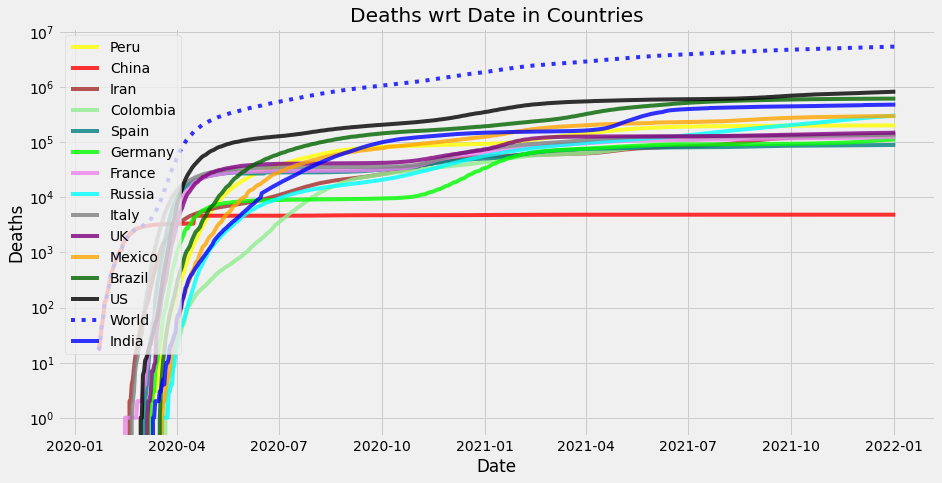

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-29,13154,1730636,489267,9761,4426,223745,98016,20957,208208,69956,100760,6326,1905,221,0
2021-12-30,16764,1949468,587143,12618,5290,189917,127000,20914,206546,42070,161688,8436,1936,208,12955
2021-12-31,22775,1715785,497151,10190,18061,191197,144255,20482,232200,21764,0,10401,1703,248,0
2022-01-01,27553,1083529,115984,3782,0,162972,141256,19606,219126,2968,0,12415,1002,209,4577
2022-01-02,33750,867400,254091,1806,9193,135123,61137,18088,58432,12636,0,11318,1510,158,4346


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-29,8166,813025,202795,5970,2461,93227,33671,27295,70458,37720,42601,2696,2762,125,1401
2021-12-30,8739,888788,228418,6414,2650,99673,39893,26870,79531,38010,50540,3079,2707,130,2171
2021-12-31,9675,943921,246333,6665,3677,105775,46850,26444,89709,36927,47171,3567,2640,138,2026
2022-01-01,10866,953228,237643,6473,3432,109588,53144,25988,98336,34663,44026,4157,2531,143,2196
2022-01-02,12392,947506,238740,6162,3816,111290,53677,25461,95676,33195,41091,4634,2463,144,2340


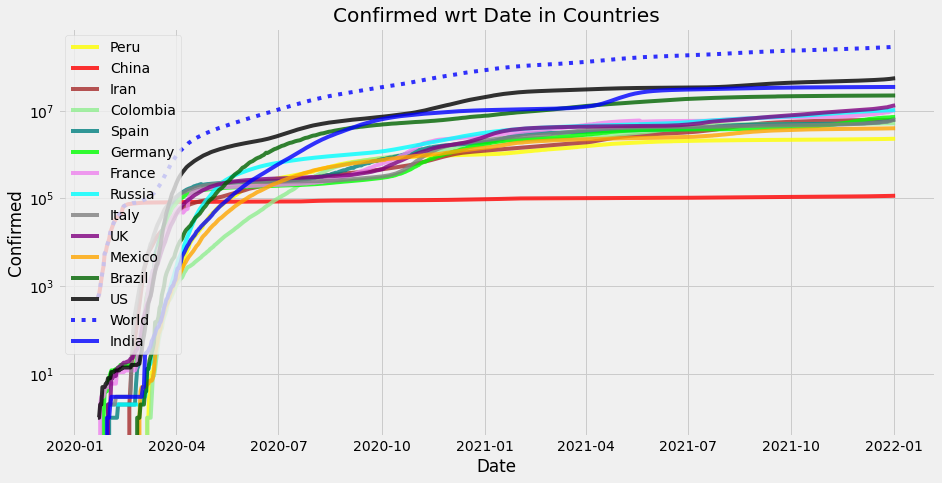

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-29,268,7879,2184,117,125,69,136,903,184,613,78,33,53,0,0
2021-12-30,220,7452,1409,154,188,336,156,905,182,322,74,35,45,0,129
2021-12-31,406,7037,1235,85,296,203,155,880,189,182,0,41,34,0,0
2022-01-01,284,3916,280,33,0,155,111,825,110,46,0,44,33,0,37
2022-01-02,123,3081,244,34,97,73,133,788,91,4,0,40,41,0,51


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-12-29,321.74,6657.90,1492.27,117.40,125.22,87.48,134.18,983.86,173.33,322.53,56.79,42.02,49.19,0.0,33.82
2021-12-30,309.02,6757.17,1481.86,121.98,133.07,118.55,136.91,974.00,174.41,322.47,58.94,41.14,48.66,0.0,45.72
2021-12-31,321.14,6792.15,1451.00,117.36,153.43,129.10,139.17,962.25,176.24,304.91,51.57,41.12,46.83,0.0,40.00
2022-01-01,316.50,6432.63,1304.63,106.81,134.26,132.34,135.65,945.10,167.96,272.55,45.12,41.48,45.10,0.0,39.63
2022-01-02,292.31,6013.67,1172.05,97.71,129.60,124.92,135.32,925.46,158.34,238.98,39.48,41.30,44.59,0.0,41.05


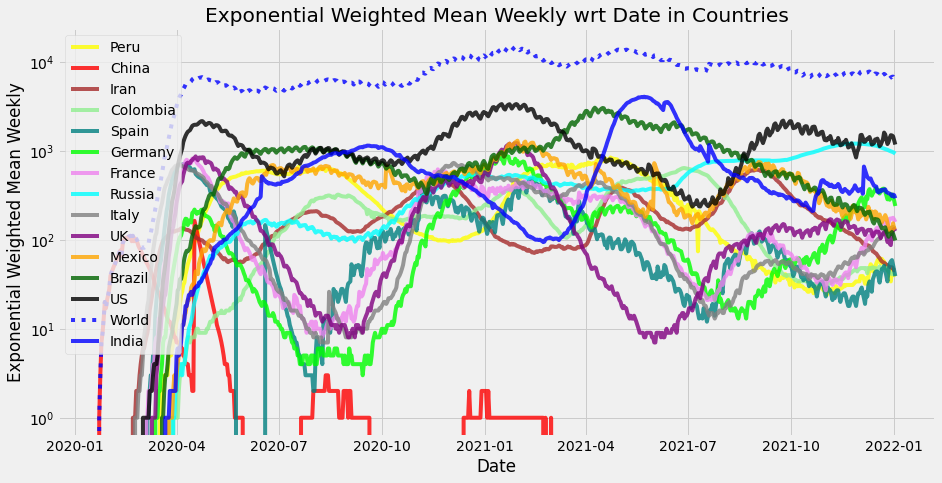

In [18]:
plotter(np.round(AVG), name)

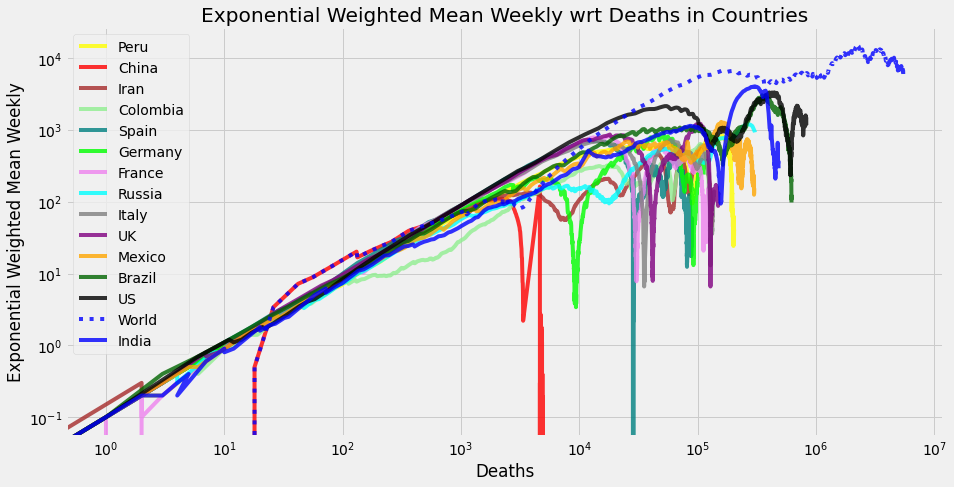

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

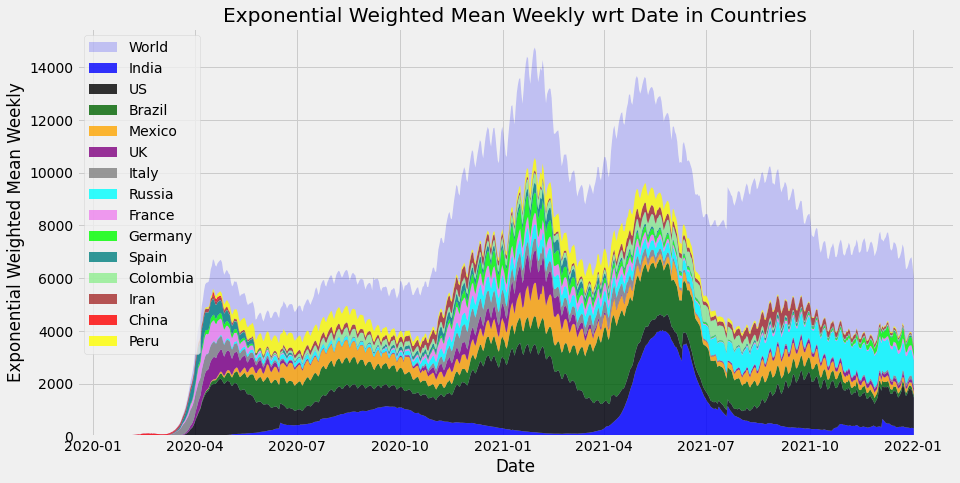

In [20]:
stackplotter(AVG, name)

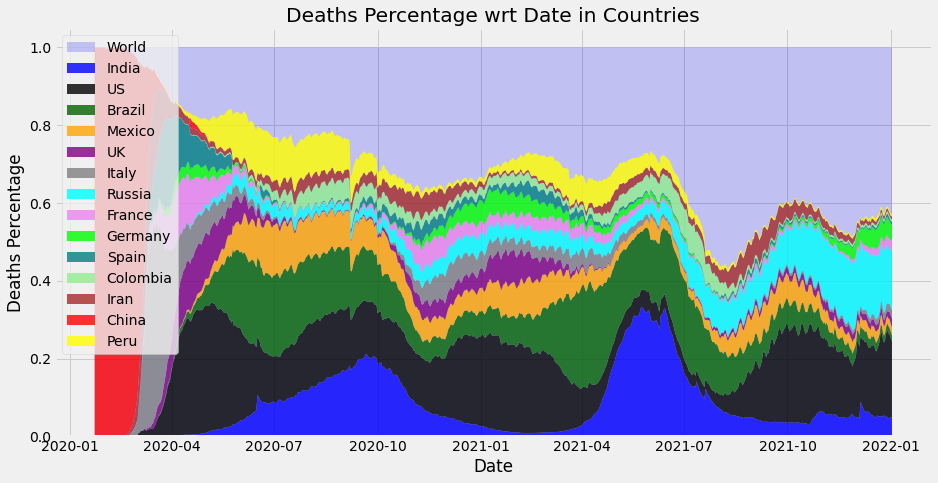

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

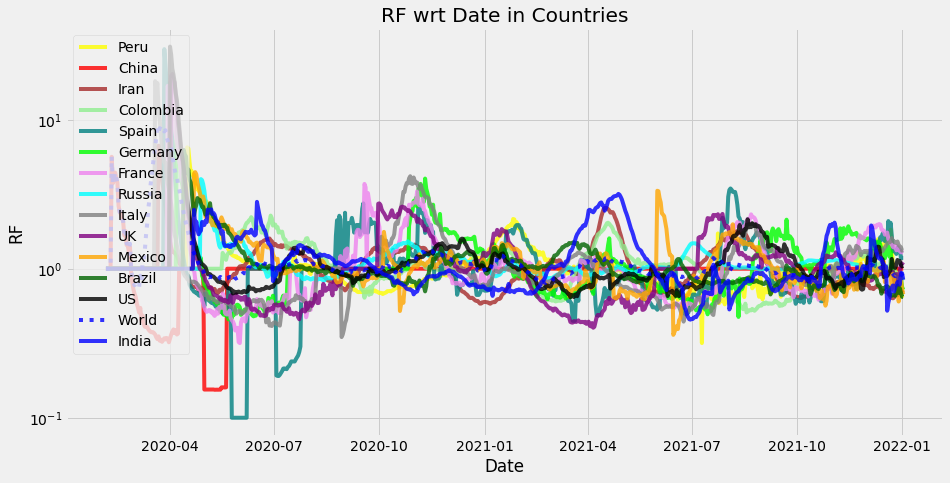

In [23]:
plotter(Reproductivity, 'RF')

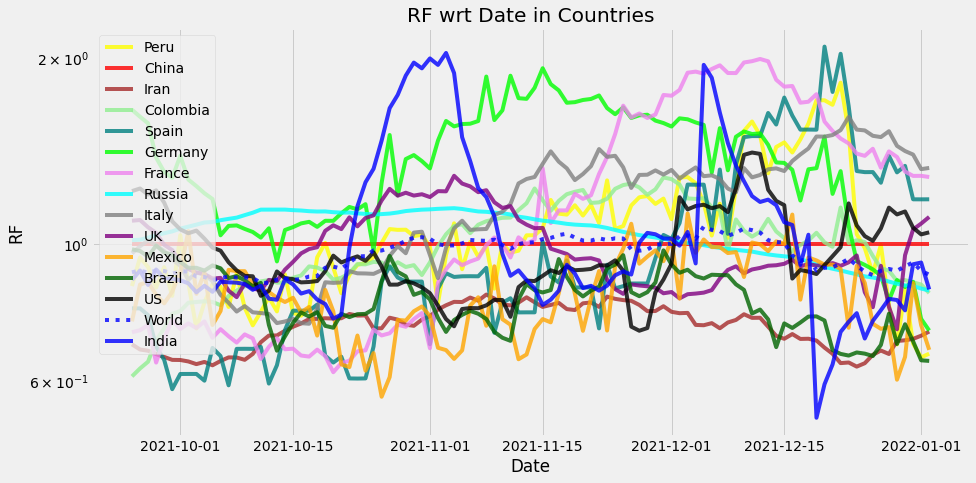

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

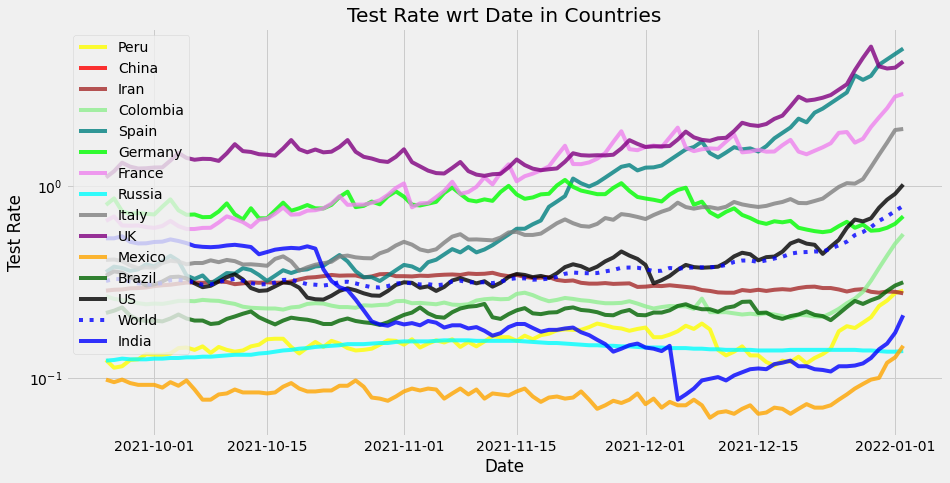

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

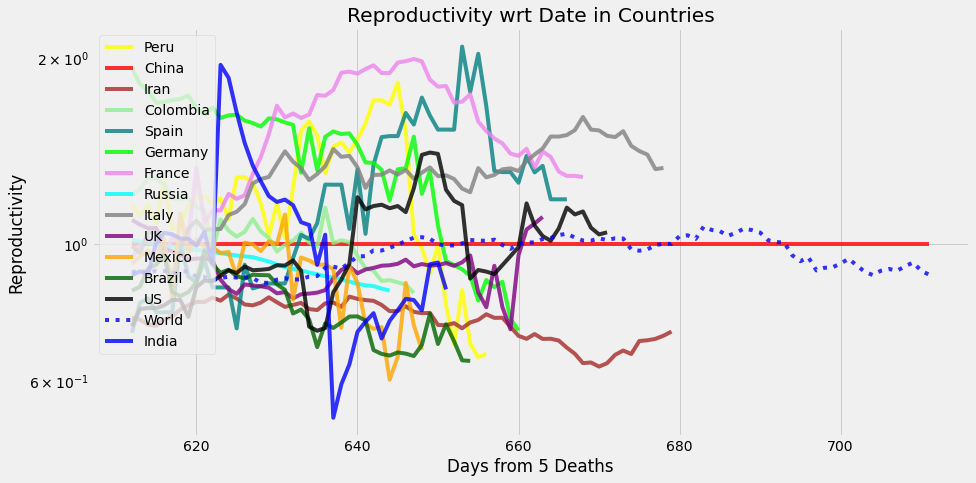

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

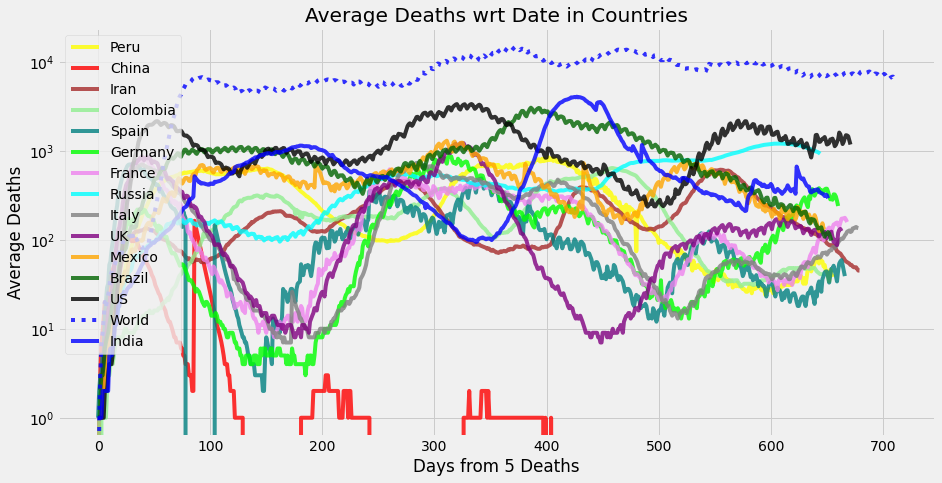

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

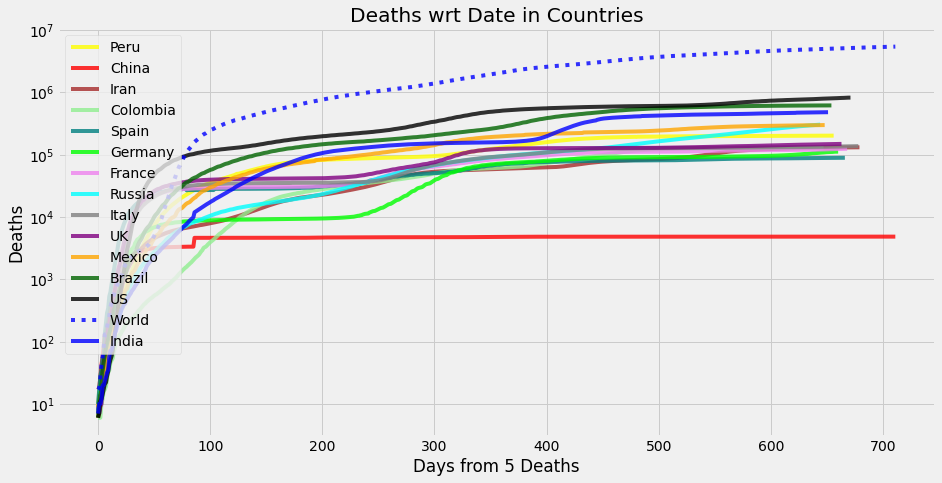

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5443578,3081,6171.43,6013.67,0.8911,290146835,0.788,947506,1088.72
US,826060,244,1350.14,1172.05,1.0440,55114057,1.018,238740,165.21
Brazil,619401,34,95.57,97.71,0.6461,22297427,0.315,6162,123.88
India,481893,123,270.86,292.31,0.8438,34922882,0.212,12392,96.38
Russia,304284,788,874.14,925.46,0.8402,10358099,0.138,25461,60.86
Mexico,299525,97,109.43,129.60,0.6733,3988916,0.147,3816,59.90
Peru,202741,51,36.14,41.05,0.6638,2301177,0.285,2340,40.55
UK,149324,73,142.86,124.92,1.1058,13309651,4.454,111290,29.86
Indonesia,144097,1,6.29,6.22,1.0000,4263168,NaN,227,28.82


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5443578,3081,6171.43,6013.67,0.8911,290146835,0.788,947506,1088.72
US,826060,244,1350.14,1172.05,1.0440,55114057,1.018,238740,165.21
Russia,304284,788,874.14,925.46,0.8402,10358099,0.138,25461,60.86
Poland,97592,33,466.43,428.89,1.0654,4127428,0.174,14956,19.52
India,481893,123,270.86,292.31,0.8438,34922882,0.212,12392,96.38
Germany,112161,4,246.43,238.98,0.7236,7208790,0.695,33195,22.43
Vietnam,32831,221,231.00,231.44,1.0131,1763040,0.338,15644,6.57
Ukraine,102421,121,218.57,251.93,0.6725,3854405,0.140,7073,20.48
France,124930,91,186.14,158.34,1.2834,10355341,3.021,95676,24.99


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5443578


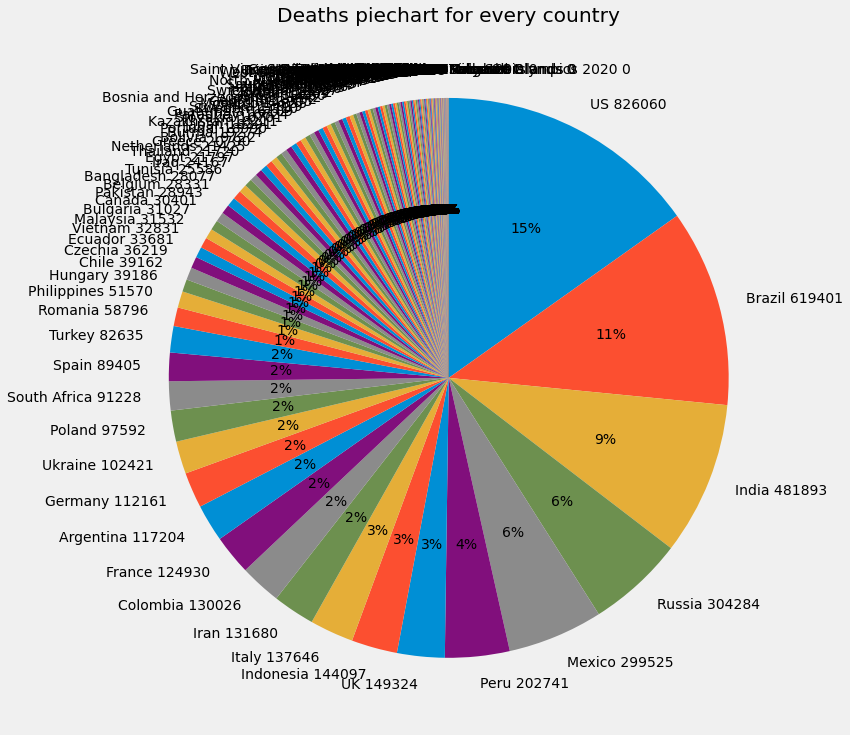

In [35]:
piechart('Deaths')

World total:  6171


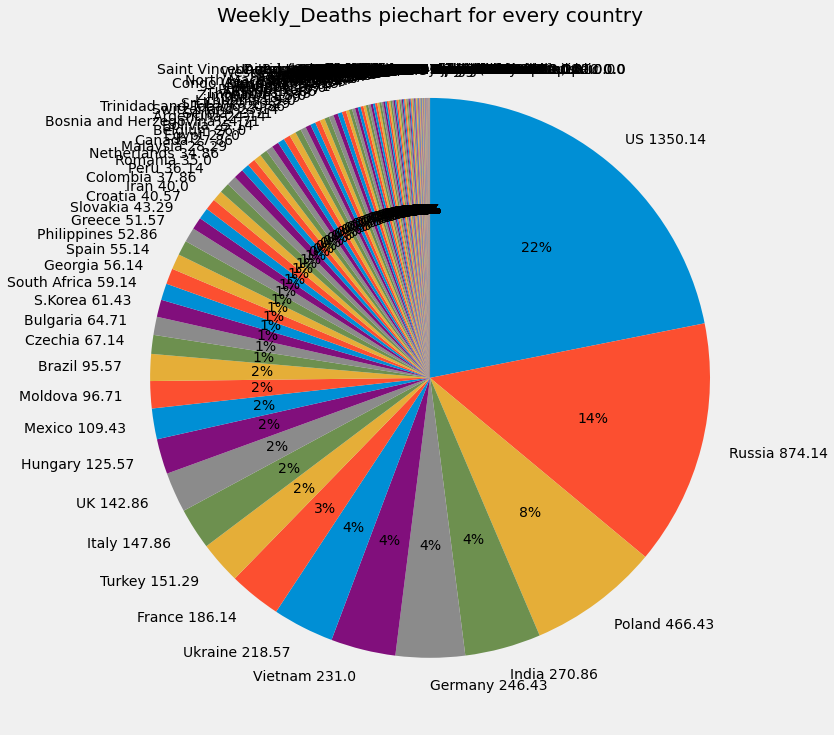

In [36]:
piechart('Weekly_Deaths')

World total:  3081


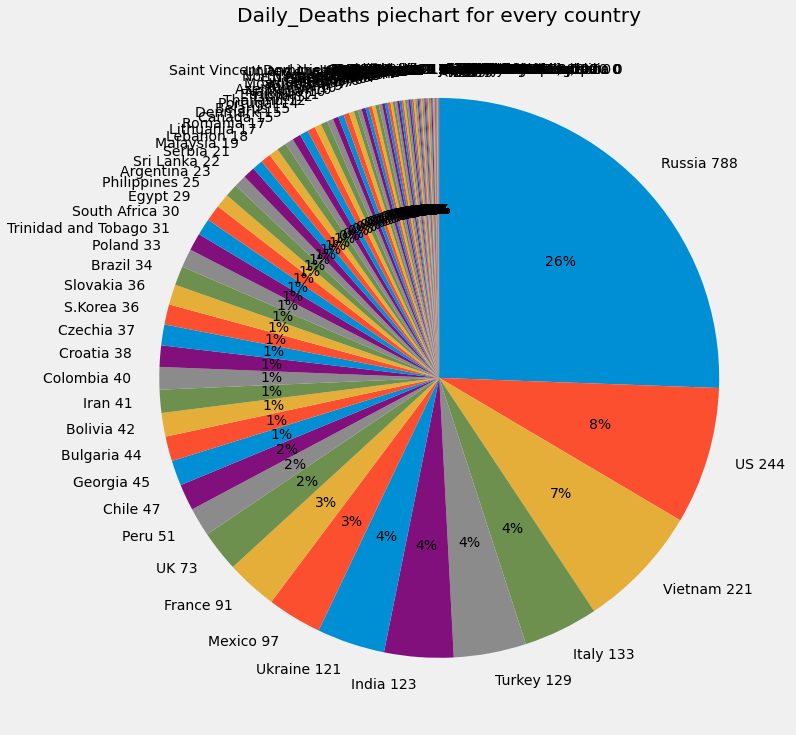

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2022-01-03


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1088715600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master b916c77] `date` update
 1 file changed, 19 insertions(+), 5 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   82e98d2..b916c77  master -> master
